In [49]:
import pandas as pd
import matplotlib.pyplot as plt


In [50]:
ventas = pd.read_csv("sales-cars.csv")

In [51]:
ventas.head()

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


In [52]:
ventas.size

72

In [53]:
ventas.shape

(36, 2)

In [54]:
type(ventas) # no podemos hacer análisis de series con data frame, hay que modificarlo con series de tiempo


pandas.core.frame.DataFrame

In [55]:
ventas = pd.read_csv("sales-cars.csv",index_col=[0],parse_dates=True, squeeze=True) #"parse transformar en fecha para hacer el análisis"

In [56]:
ventas.head()

Month
2016-01-01    266
2016-02-01    146
2016-03-01    183
2016-04-01    119
2016-05-01    180
Name: Sales, dtype: int64

In [57]:
type(ventas)

pandas.core.series.Series

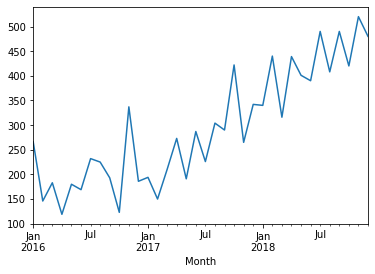

In [58]:
ventas.plot()

In [59]:
ventas.describe()

count     36.00000
mean     295.75000
std      117.81908
min      119.00000
25%      192.50000
50%      280.00000
75%      402.75000
max      520.00000
Name: Sales, dtype: float64

In [60]:
ventas.size

36

In [61]:
#suavizar la curva antes de hacer nuestro modelo, con rooling average
ventas_ma = ventas.rolling(window=10).mean() #window es tiempo, tome 10 datos para calcular media

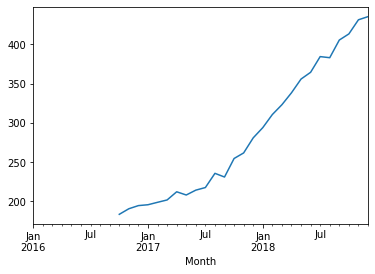

In [62]:
ventas_ma.plot() # ver la tendencia

In [63]:
#crear modelo
ventas


Month
2016-01-01    266
2016-02-01    146
2016-03-01    183
2016-04-01    119
2016-05-01    180
2016-06-01    169
2016-07-01    232
2016-08-01    225
2016-09-01    193
2016-10-01    123
2016-11-01    337
2016-12-01    186
2017-01-01    194
2017-02-01    150
2017-03-01    210
2017-04-01    273
2017-05-01    191
2017-06-01    287
2017-07-01    226
2017-08-01    304
2017-09-01    290
2017-10-01    422
2017-11-01    265
2017-12-01    342
2018-01-01    340
2018-02-01    440
2018-03-01    316
2018-04-01    439
2018-05-01    401
2018-06-01    390
2018-07-01    490
2018-08-01    408
2018-09-01    490
2018-10-01    420
2018-11-01    520
2018-12-01    480
Name: Sales, dtype: int64

In [64]:
venta_base = pd.concat([ventas, ventas.shift(1)], axis=1)

In [65]:
venta_base

,Sales,Sales
Month,,
2016-01-01,266,NaN
2016-02-01,146,266.0
2016-03-01,183,146.0
2016-04-01,119,183.0
2016-05-01,180,119.0
2016-06-01,169,180.0
2016-07-01,232,169.0
2016-08-01,225,232.0
2016-09-01,193,225.0


In [66]:
venta_base.columns

Index(['Sales', 'Sales'], dtype='object')

In [67]:
venta_base.columns=['ventas_actuales','ventas_pronosticadas']

In [68]:
venta_base.columns

Index(['ventas_actuales', 'ventas_pronosticadas'], dtype='object')

In [69]:
venta_base.head()

,ventas_actuales,ventas_pronosticadas
Month,,
2016-01-01,266,NaN
2016-02-01,146,266.0
2016-03-01,183,146.0
2016-04-01,119,183.0
2016-05-01,180,119.0


In [70]:
venta_base.dropna(inplace=True) #para guardarlos cambios
venta_base.head()

,ventas_actuales,ventas_pronosticadas
Month,,
2016-02-01,146,266.0
2016-03-01,183,146.0
2016-04-01,119,183.0
2016-05-01,180,119.0
2016-06-01,169,180.0


In [71]:
from sklearn.metrics import mean_squared_error
import numpy as np


In [72]:
ventas_error = mean_squared_error(venta_base.ventas_actuales,venta_base.ventas_pronosticadas)

In [73]:
ventas_error

7650.857142857143

In [74]:
np.sqrt(ventas_error) # error de 87

87.46917824500893

In [75]:
#MODELO DE PRONOSTICOS CON ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

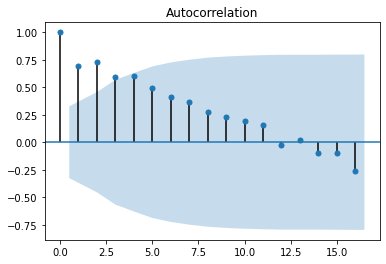

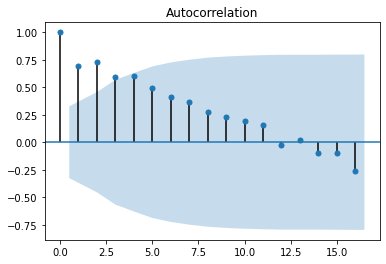

In [76]:
plot_acf(ventas)

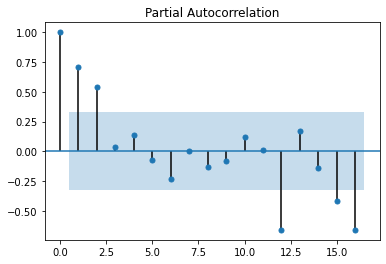

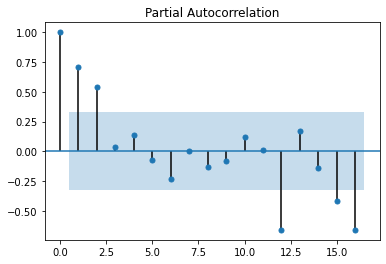

In [77]:
plot_pacf(ventas)

In [78]:
# el valor de Q es 3, p es 2 y el valor de d es 0-2. PRIMER GRÁFICO depues del periodo 3 entra en zona crítica, Q es 3 en el primer gráfico, EN EL SEGUNDO, tiene 2 periodos antes de entrar a la zona crítica, p es 2, y d entre 0-2 

In [79]:
from statsmodels.tsa.arima_model import ARIMA

In [80]:
ventas_train = ventas[0:25]
ventas_test = ventas[25:36]

In [81]:
ventas_model = ARIMA(ventas_train, order=(3,1,2)) #(p,q,d) esos son los mejores parámetros?

In [82]:
ventas_model_fit = ventas_model.fit()

In [83]:
ventas_pronosticos = ventas_model_fit.forecast(steps=11)[0] #cantidad de tiempo del pronóstico, realice un pronóstico de 11 datos


In [84]:
ventas_pronosticos

array([411.70782201, 363.90963905, 358.88373145, 351.33913028,
       406.93660836, 418.27605126, 410.68691797, 385.52905955,
       405.21079522, 435.96150558, 453.9238287 ])

In [85]:
ventas_test

Month
2018-02-01    440
2018-03-01    316
2018-04-01    439
2018-05-01    401
2018-06-01    390
2018-07-01    490
2018-08-01    408
2018-09-01    490
2018-10-01    420
2018-11-01    520
2018-12-01    480
Name: Sales, dtype: int64

In [86]:
# para el primer se vendieron 440, y se pronostico 411

In [87]:
# calcular el error
np.sqrt(mean_squared_error(ventas_test,ventas_pronosticos))

57.441136353453786

In [88]:
ventas_pronosticos = ventas_model_fit.forecast(steps=20)[0]

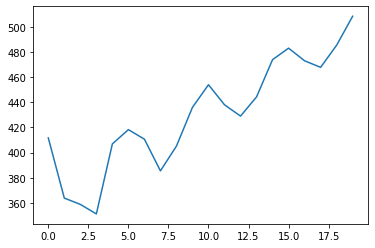

In [89]:
ventas_pronosticos = pd.Series(ventas_pronosticos)
ventas_pronosticos.plot()

In [90]:
#probar diferentes parámetros para ARIMA, basándose en los gráficos de arriba
p_valores = range(0,5)
q_valores = range(0,3)
d_valores = range(0,5)

In [91]:
import warnings
warnings.filterwarnings("ignore")

In [95]:
for p in p_valores:
  for q in q_valores:
    for d in d_valores:
      order = (p,d,q)
      train,test = ventas[0:25],ventas[25:36]
      predicciones = list()
      for i in range (len(test)):
        try:
          model=ARIMA(train,order)
          model_fit = model.fit(disp=0)
          pred_y = model_fit.forecast([0])
          predicciones.append(pred_y) #agregar a una lista
          error = np.sqrt(mean_squared_error(test,predicciones))
          print('ARIMA%s MSE=%.2f'%(order,error))
        except:
          continue